In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv(r"C:\Users\Laptop\Documents\cognifyz_Technologies_projects\Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
import mysql.connector as connection 

In [10]:
db = connection.connect(host='127.0.0.1',database='cognifyz_it_restaurant_dataset_schema',user='root',password='Fortune_12012006',use_pure= True)

In [11]:
#1 TOP CUISINES

In [13]:
task_1_a= 'SELECT Cuisines, COUNT(*) AS cuisines_count FROM restaurant_dataset GROUP BY Cuisines ORDER BY cuisines_count DESC LIMIT 3;'

In [14]:
#1a. Top 3 most common Cuisines
top_3_most_common_cuisines= pd.read_sql(task_1_a,db)
top_3_most_common_cuisines

C:\Users\Laptop\AppData\Local\Temp\ipykernel_8148\1478659475.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_3_most_common_cuisines= pd.read_sql(task_1_a,db)


,Cuisines,cuisines_count
0,North Indian,2808
1,"North Indian, Chinese",1533
2,Chinese,1062


In [15]:
task_1_b = """ WITH cuisines_counts AS(
SELECT Cuisines,COUNT(`Restaurant Name`) AS number_of_restaurants
FROM restaurant_dataset
GROUP BY Cuisines
ORDER BY number_of_restaurants DESC
LIMIT 3), 
total_restaurants AS (
SELECT COUNT(DISTINCT `Restaurant Name`) AS total_restaurant
FROM restaurant_dataset)
SELECT cuisines_counts.Cuisines, cuisines_counts.number_of_restaurants,
ROUND((cuisines_counts.number_of_restaurants/total_restaurants.total_restaurant)*100,2)
AS percentage FROM cuisines_counts
 CROSS JOIN total_restaurants;"""

In [16]:
#1b. Percentage Of Restaurants that serve each of the top Cuisines
percemtage_of_restaurants_that_serve_each_of_the_top_cuisines = pd.read_sql(task_1_b,db)
percemtage_of_restaurants_that_serve_each_of_the_top_cuisines

C:\Users\Laptop\AppData\Local\Temp\ipykernel_8148\653982195.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  percemtage_of_restaurants_that_serve_each_of_the_top_cuisines = pd.read_sql(task_1_b,db)


,Cuisines,number_of_restaurants,percentage
0,North Indian,2808,37.78
1,"North Indian, Chinese",1533,20.62
2,Chinese,1062,14.29


In [17]:
#CITY ANALYSIS

In [18]:
task_2_a = """SELECT City, COUNT(`Restaurant Name`) AS num_restaurant
 FROM restaurant_dataset
 GROUP BY City
 ORDER BY num_restaurant DESC
 LIMIT 1;"""

In [19]:
#2a.  City With The Highest Number Of Restaurants In The Dataset
city_with_the_highest_number_of_restaurants= pd.read_sql(task_2_a,db)
city_with_the_highest_number_of_restaurants

C:\Users\Laptop\AppData\Local\Temp\ipykernel_8148\2220076777.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  city_with_the_highest_number_of_restaurants= pd.read_sql(task_2_a,db)


,City,num_restaurant
0,New Delhi,16419


In [20]:
task_2_b= """SELECT City,AVG(`Aggregate rating`) avg_rating
 FROM restaurant_dataset
 GROUP BY City
 ORDER BY avg_rating DESC;"""

In [21]:
 #2b. Average Rating For Restaurants In Each City
average_rating_for_restaurants_in_each_city = pd.read_sql(task_2_b,db)
average_rating_for_restaurants_in_each_city

C:\Users\Laptop\AppData\Local\Temp\ipykernel_8148\1307882748.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  average_rating_for_restaurants_in_each_city = pd.read_sql(task_2_b,db)


,City,avg_rating
0,Inner City,4.900000
1,Quezon City,4.800000
2,Makati City,4.650000
3,Pasig City,4.633333
4,Mandaluyong City,4.625000
...,...,...
136,New Delhi,2.438845
137,Mc Millan,2.400000
138,Montville,2.400000
139,Noida,2.036204


In [22]:
task_2_c= """ SELECT City,AVG(`Aggregate rating`) avg_rating
 FROM restaurant_dataset
 GROUP BY City
 ORDER BY avg_rating DESC
 LIMIT 1;"""

In [26]:
 #2C. City With The Highest Average Rating
city_with_the_highest_average_rating= pd.read_sql(task_2_c,db)
city_with_the_highest_average_rating

C:\Users\Laptop\AppData\Local\Temp\ipykernel_8148\3914145143.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  city_with_the_highest_average_rating= pd.read_sql(task_2_c,db)


,City,avg_rating
0,Inner City,4.9


In [34]:
# TASK 3, Price Range Distribution

In [42]:
#Voting Analysis
#Resstaurants by votes
restaurants_by_votes = df.groupby("Restaurant Name")["Votes"].sum().to_frame().head(10)

In [44]:
#Top 10 Restaurants with the highest number of votes 
ranked_restaurants_by_votes_top= restaurants_by_votes.sort_values("Votes",ascending= False)
ranked_restaurants_by_votes_top

,Votes
Restaurant Name,
'Ohana,1151
10 Downing Street,670
11th Avenue Cafe Bistro,377
#OFF Campus,216
#45,209
#Dilliwaala6,124
10 To 10 In Delhi,73
#Urban Caf��,49
#InstaFreeze,2


In [46]:
#Top 10 Restaurants with the lowest number of votes 
ranked_restaurants_by_votes_bottom= restaurants_by_votes.sort_values("Votes",ascending= True)
ranked_restaurants_by_votes_bottom

,Votes
Restaurant Name,
#hashtag,0
#InstaFreeze,2
#Urban Caf��,49
10 To 10 In Delhi,73
#Dilliwaala6,124
#45,209
#OFF Campus,216
11th Avenue Cafe Bistro,377
10 Downing Street,670


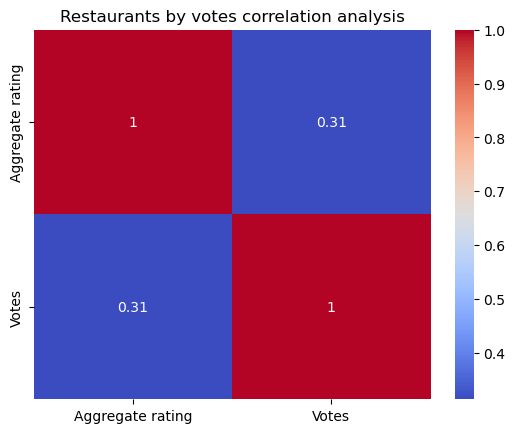

In [48]:
#Votes by rating correlation analysis
votes_by_rating = df[["Aggregate rating","Votes"]]
sns.heatmap(votes_by_rating.corr(), annot= True , cmap="coolwarm")
plt.title("Restaurants by votes correlation analysis")
plt.show()
#There is a low corrleation between Aggregate Rating and Votes

In [49]:
#Price range VS Online Delivery and table booking
Price_range_VS_Online_Delivery_and_table_booking = df[["Price range","Has Online delivery","Has Table booking"]]
Price_range_VS_Online_Delivery_and_table_booking

,Price range,Has Online delivery,Has Table booking
0,3,No,Yes
1,3,No,Yes
2,4,No,Yes
3,4,No,No
4,4,No,Yes
...,...,...,...
9546,3,No,No
9547,3,No,No
9548,4,No,No
9549,4,No,No


In [50]:
Online_delivery_and_table_booking_by_average_price_range= df.groupby(["Has Online delivery","Has Table booking"])["Price range"].mean().to_frame()
Online_delivery_and_table_booking_by_average_price_range

Price range
Has Online delivery Has Table booking             
No                  No                    1.604673
                    Yes                   3.163209
Yes                 No                    1.735119
                    Yes                   2.804598

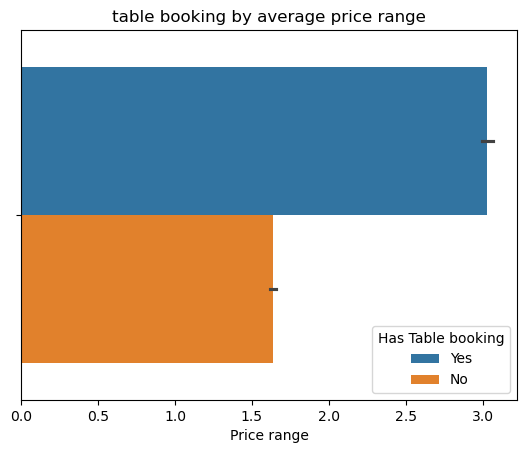

In [52]:
sns.barplot(x='Price range',hue='Has Table booking',data=df)
plt.title("table booking by average price range")
plt.show()

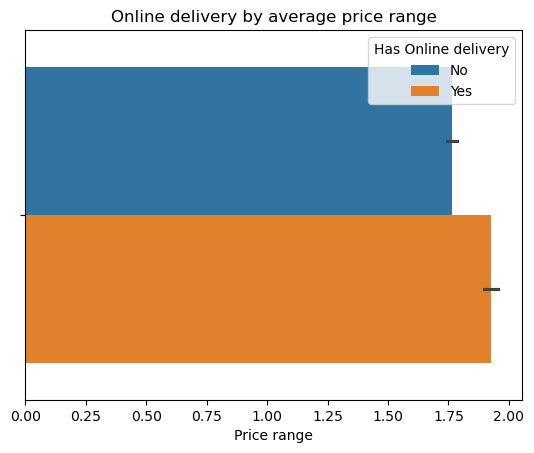

In [55]:
 
sns.barplot(x='Price range',hue='Has Online delivery',data=df)
plt.title("Online delivery by average price range")
plt.show()

In [57]:
#Restaurant with high Price range have low online delivery services and high table bookings 
#Restaurants with lower price range have high online deliver services and table bookings

In [61]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
